In [151]:
# import libraries
%pip install openpyxl 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [79]:
# set input directory
input_dir = 'input'

In [80]:
# set dataset file name
input_data_file = 'data.xlsx'

In [81]:
# # # display list of files in input directory
# # os.listdir('input')

# Check if the directory exists before listing files
if os.path.exists(input_dir) and os.path.isdir(input_dir):
    files = os.listdir(input_dir)
    print("Files in 'input' directory:", files)
else:
    print(f"Error: The directory '{input_dir}' does not exist.")


Files in 'input' directory: ['city_day.csv', 'city_hour.csv', 'data.xlsx', 'labeled_data.csv']


In [82]:
# to get the input data path
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'.\\input\\data.xlsx'

In [83]:
# # # to read data from excel file
raw_data = pd.read_excel("input/data.xlsx")

In [84]:
raw_data.head()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
0,16,2.1,0.79,0.14,1.2,16,17,37,177,78x,57,12
1,16,2.1,0.8,0.15,1.3,16,17,36,178,77x,57,11
2,16,2.1,0.71,0.13,1,13,14,38,163,72x,57,8
3,15,2,0.66,0.12,0.8,11,12,39,147,65x,58,6.5
4,15,2,0.53,0.11,0.6,10,11,38,131,56x,58,5.5


In [85]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   TEMP    200169 non-null  object
 1   CH4     95822 non-null   object
 2   CO      217310 non-null  object
 3   NMHC    95614 non-null   object
 4   NO      217227 non-null  object
 5   NO2     216681 non-null  object
 6   NOx     217228 non-null  object
 7   O3      199864 non-null  object
 8   PM10    215761 non-null  object
 9   PM2.5   215768 non-null  object
 10  RH      200243 non-null  object
 11  SO2     217046 non-null  object
dtypes: object(12)
memory usage: 20.0+ MB


In [86]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [87]:
raw_data.isna().sum()

TEMP      18470
CH4      122817
CO         1329
NMHC     123025
NO         1412
NO2        1958
NOx        1411
O3        18775
PM10       2878
PM2.5      2871
RH        18396
SO2        1593
dtype: int64

In [88]:
# drop rows which contains nan
raw_data.dropna(axis = 0, inplace=True)

In [89]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [90]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [91]:
raw_data['O3'] = raw_data['O3'].apply(numeric)
#print(raw_data['NO'].describe())

In [92]:
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)

In [93]:
len(raw_data)

77393

In [94]:
raw_data = raw_data[0:5000]

In [95]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   CH4     5000 non-null   float64
 2   CO      5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NO2     5000 non-null   float64
 6   NOx     5000 non-null   float64
 7   O3      5000 non-null   float64
 8   PM10    5000 non-null   float64
 9   PM2.5   5000 non-null   float64
 10  RH      5000 non-null   float64
 11  SO2     5000 non-null   float64
dtypes: float64(12)
memory usage: 507.8 KB


In [96]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,23.435580,2.01058,0.601756,0.26360,6.626260,22.59842,29.217000,26.089740,49.112200,22.068000,70.974600,3.88988
std,6.417126,0.17949,0.357413,0.20546,10.018933,10.98201,18.024268,19.868315,101.990747,21.076637,12.663271,2.55096
min,7.900000,1.10000,-0.060000,0.02000,-0.800000,3.40000,3.400000,0.000000,0.000000,0.000000,21.000000,-0.20000
25%,18.000000,1.90000,0.370000,0.13000,1.900000,15.00000,17.000000,9.400000,32.000000,13.000000,61.000000,2.20000
50%,24.000000,2.00000,0.520000,0.21000,3.500000,21.00000,25.000000,24.000000,42.000000,18.000000,73.000000,3.30000
75%,29.000000,2.00000,0.730000,0.33000,6.900000,29.00000,37.000000,38.000000,59.000000,28.000000,81.000000,4.80000
max,37.000000,3.80000,5.900000,3.27000,212.000000,79.00000,268.000000,132.000000,5004.000000,840.000000,99.000000,32.00000


In [97]:
# plt.figure(figsize=(12,5), dpi=80)
# image = plt.imread('img/significance.png')
# plt.axis('off')
# plt.imshow(image)
# plt.show()

In [98]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [99]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.79,16.0,37.0,177.0,78.0,12.0
1,0.80,16.0,36.0,178.0,77.0,11.0
2,0.71,13.0,38.0,163.0,72.0,8.0
3,0.66,11.0,39.0,147.0,65.0,6.5
4,0.53,10.0,38.0,131.0,56.0,5.5


In [100]:
# plt.figure(figsize=(20,10), dpi=80)
# image = plt.imread('img/aqi.png')
# plt.axis('off')
# plt.imshow(image)
# plt.show()

In [101]:
data['AQI']= data.max(axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI
0,0.79,16.0,37.0,177.0,78.0,12.0,177.0
1,0.80,16.0,36.0,178.0,77.0,11.0,178.0
2,0.71,13.0,38.0,163.0,72.0,8.0,163.0
3,0.66,11.0,39.0,147.0,65.0,6.5,147.0
4,0.53,10.0,38.0,131.0,56.0,5.5,131.0


In [102]:
data['AQI'].describe()

count    5000.000000
mean       53.106000
std       101.548314
min        10.000000
25%        35.000000
50%        45.000000
75%        61.000000
max      5004.000000
Name: AQI, dtype: float64

In [103]:
aqi = data['AQI']
#aqi

In [104]:
# plt.figure(figsize=(12,5), dpi=60)
# image = plt.imread('img/table.png')
# plt.axis('off')
# plt.imshow(image)
# plt.show()

In [105]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
aqi[(aqi > 200)] = 4

In [106]:
aqi.unique()

array([3., 2., 1., 0., 4.])

In [107]:
data['label'] = data['AQI'].astype('int8')

In [108]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [109]:
data.tail()

,CO,NO2,O3,PM10,PM2.5,SO2,label
5103,0.37,20.0,53.0,33.0,15.0,7.0,1
5104,0.51,34.0,55.0,42.0,21.0,21.0,1
5105,0.63,35.0,43.0,43.0,25.0,14.0,0
5106,0.59,27.0,43.0,40.0,26.0,3.6,0
5107,0.60,27.0,19.0,38.0,25.0,2.3,0


In [110]:
temp_data.head()

,TEMP,RH,CH4,NMHC,NO,NOx
0,16.0,57.0,2.1,0.14,1.2,17.0
1,16.0,57.0,2.1,0.15,1.3,17.0
2,16.0,57.0,2.1,0.13,1.0,14.0
3,15.0,58.0,2.0,0.12,0.8,12.0
4,15.0,58.0,2.0,0.11,0.6,11.0


In [111]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   RH      5000 non-null   float64
 2   CH4     5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NOx     5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


In [112]:
data.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107],
      dtype='int64', length=5000)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      5000 non-null   float64
 1   NO2     5000 non-null   float64
 2   O3      5000 non-null   float64
 3   PM10    5000 non-null   float64
 4   PM2.5   5000 non-null   float64
 5   SO2     5000 non-null   float64
 6   label   5000 non-null   int8   
dtypes: float64(6), int8(1)
memory usage: 278.3 KB


In [114]:
data = temp_data.join(data)

In [115]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


In [116]:
# save the labeled data
# data.to_csv('input/labeled_data.csv',index=False)

import os
import pandas as pd

# Define the directory and file path
output_dir = "input"
file_path = os.path.join(output_dir, "labeled_data.csv")

# Ensure the directory exists before saving the file
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created missing directory: {output_dir}")

# Save the labeled data
data.to_csv(file_path, index=False)
print(f"File saved successfully at: {file_path}")



File saved successfully at: input\labeled_data.csv


# Data Preprocessing and Labeling Completed

# Data Analysis

In [117]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


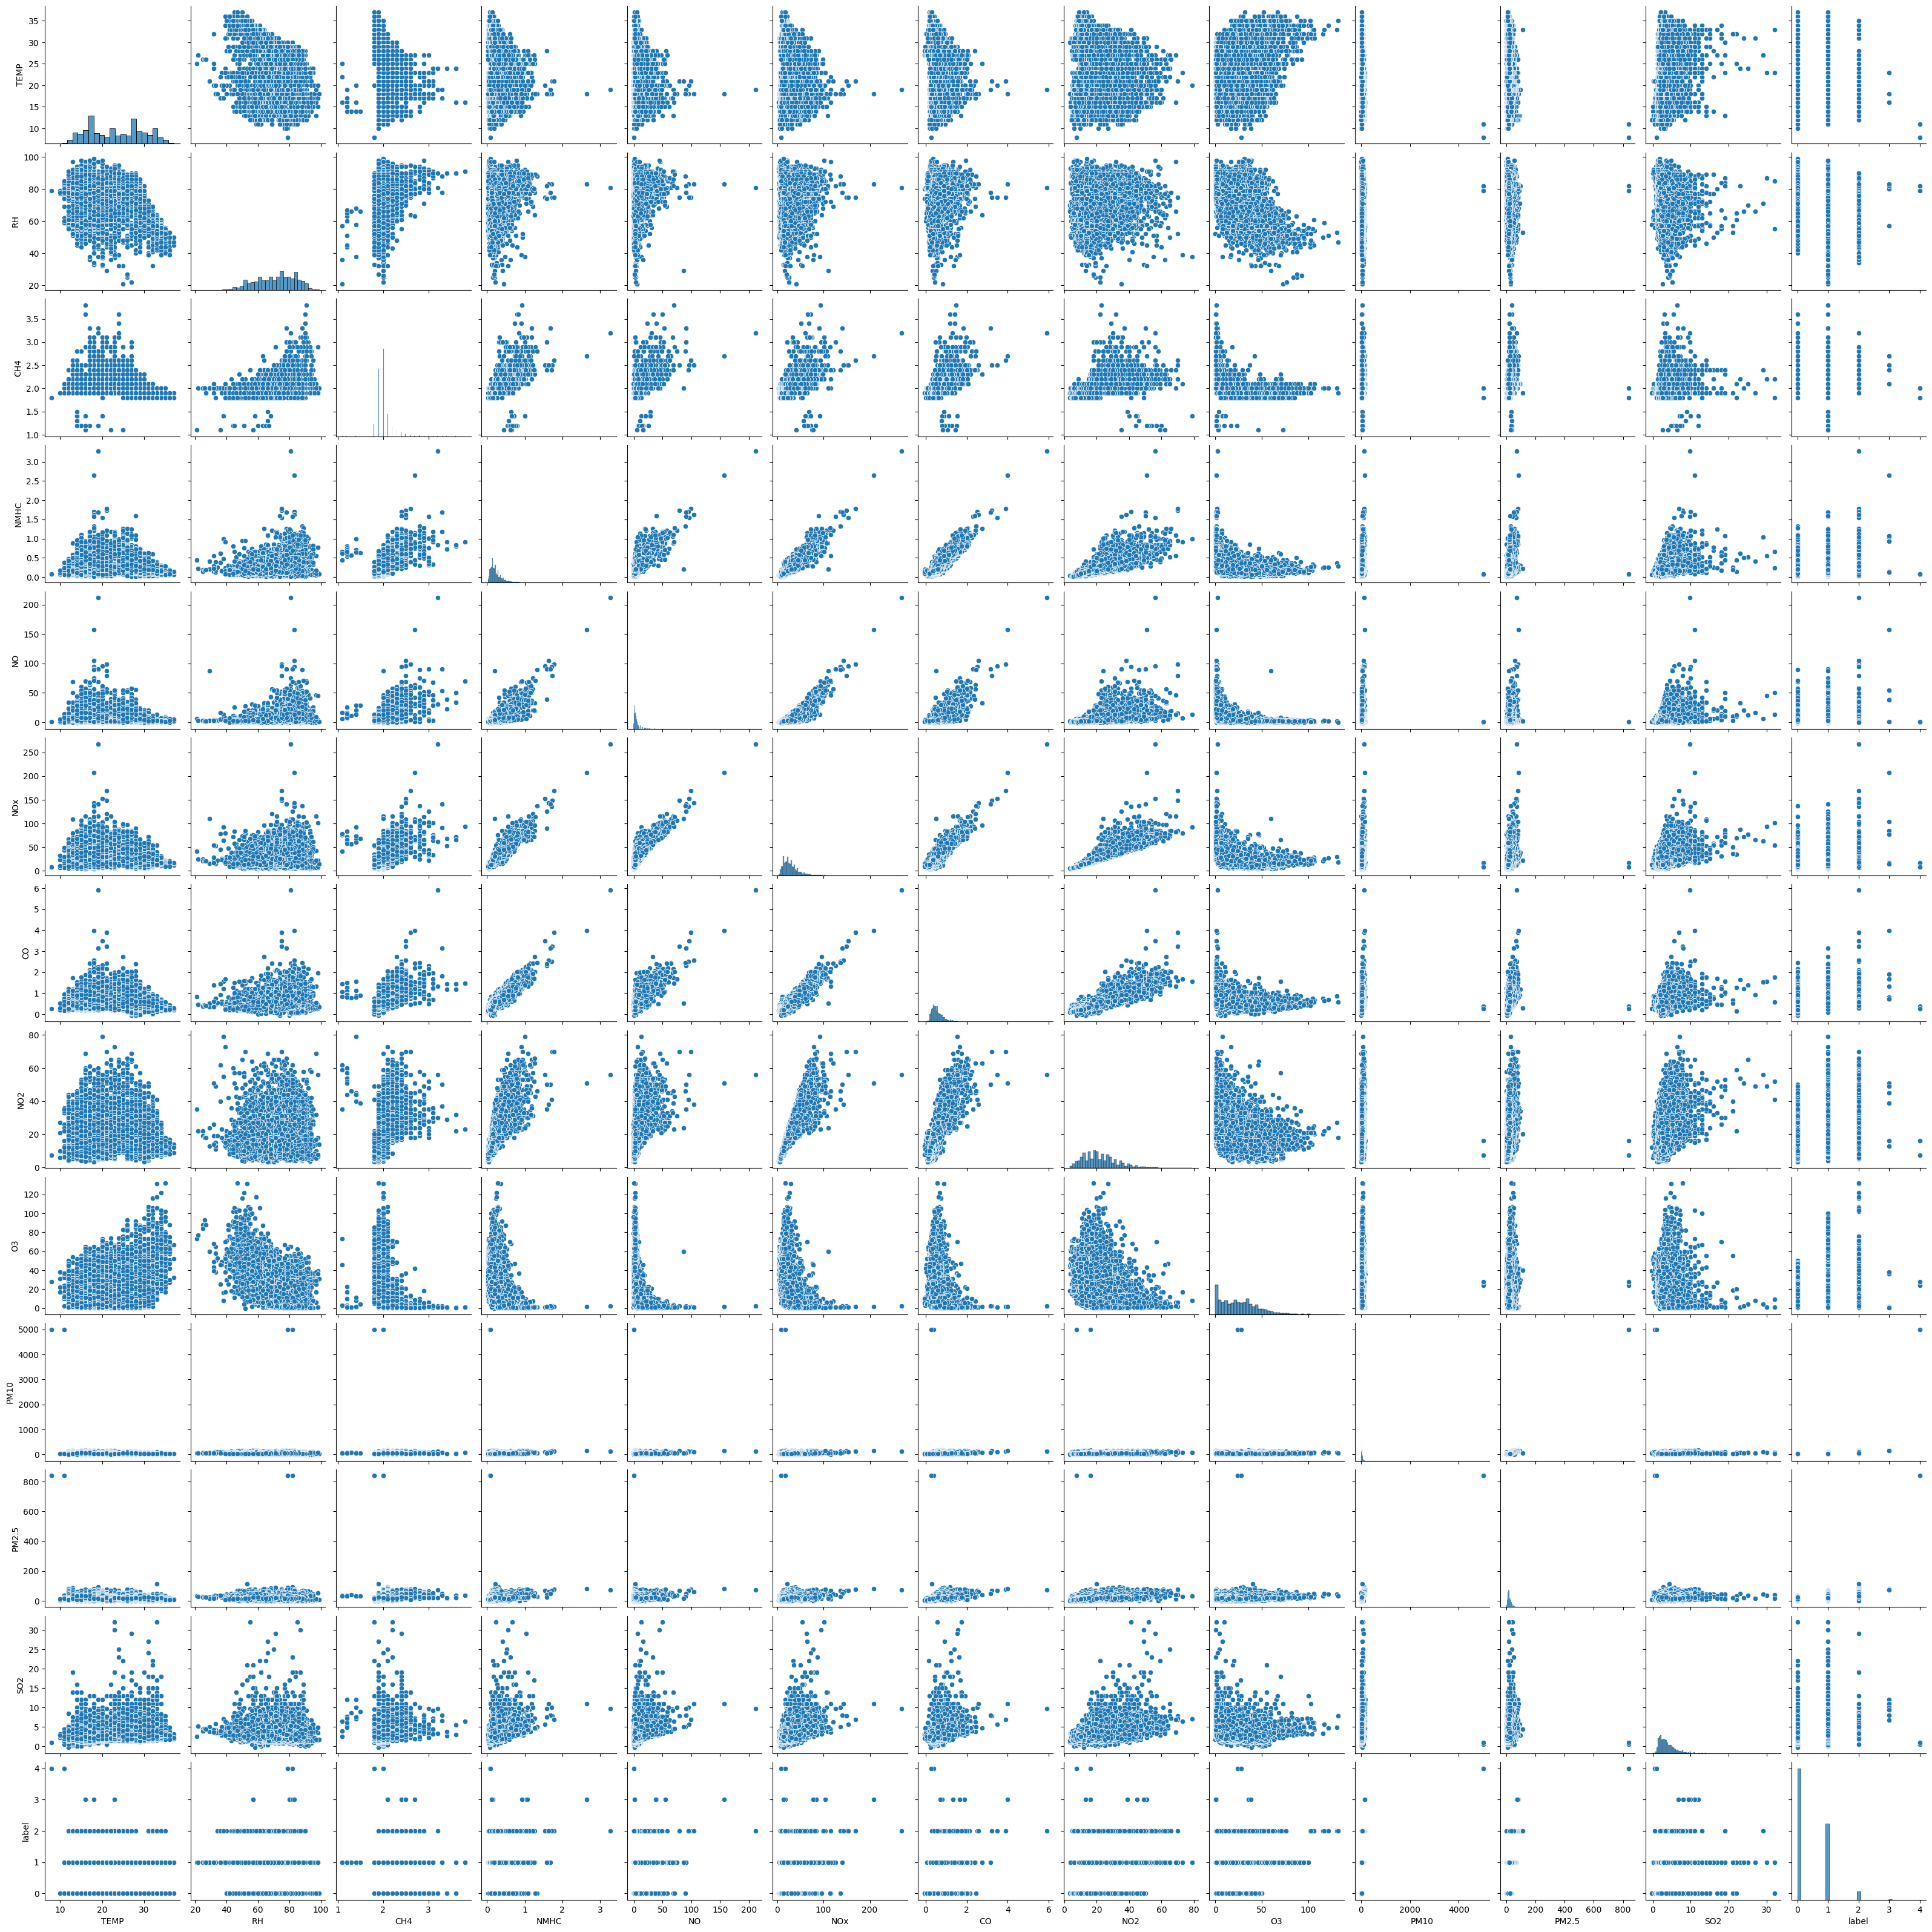

In [118]:
sns.pairplot(data)

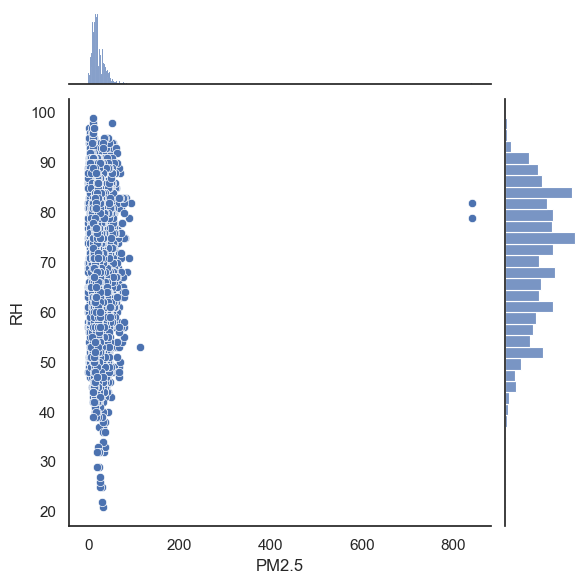

In [119]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='PM2.5',y='RH',data=data)     

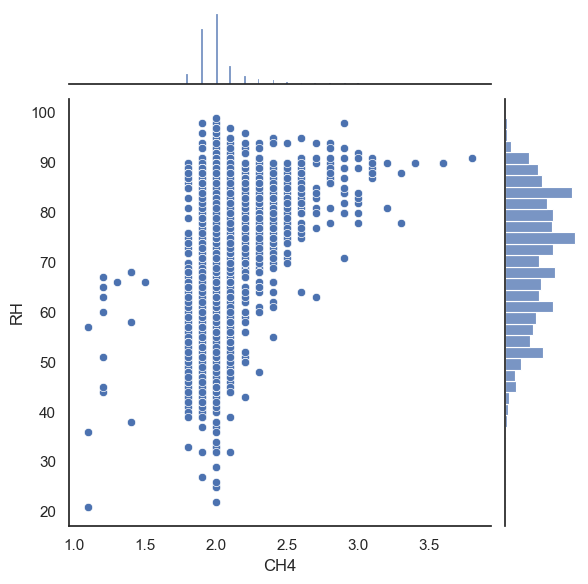

In [120]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='RH',data=data)

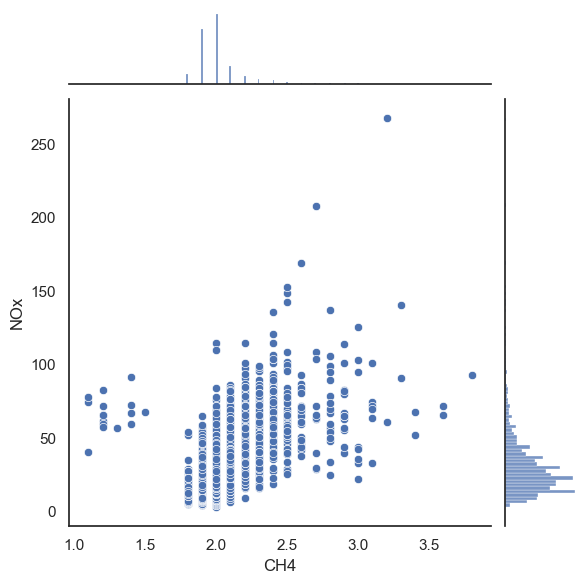

In [121]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='NOx',data=data)

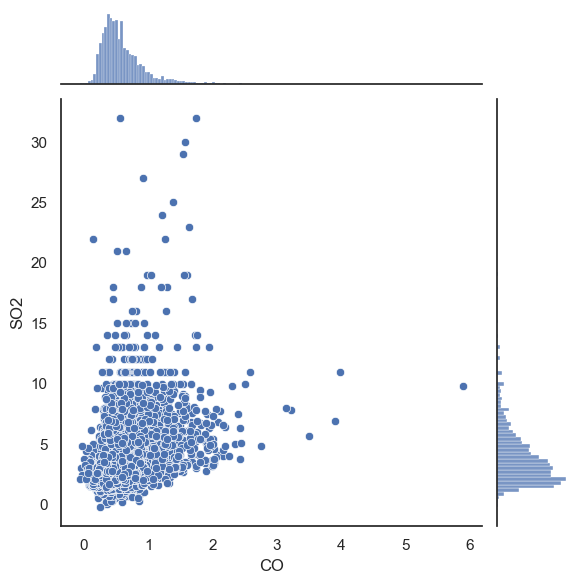

In [122]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CO',y='SO2',data=data)

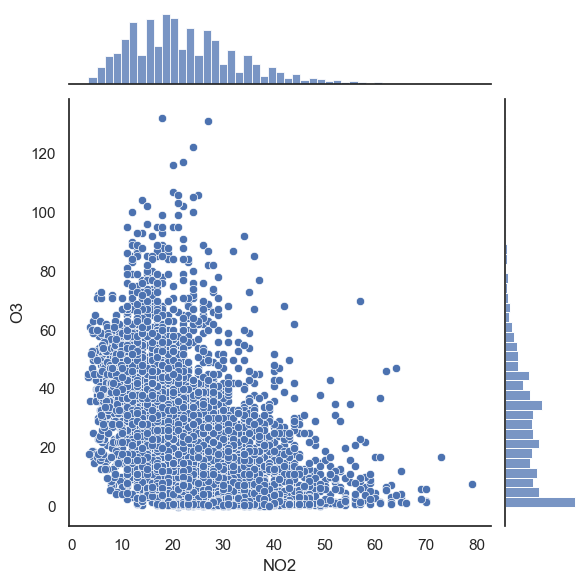

In [123]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='O3',data=data)

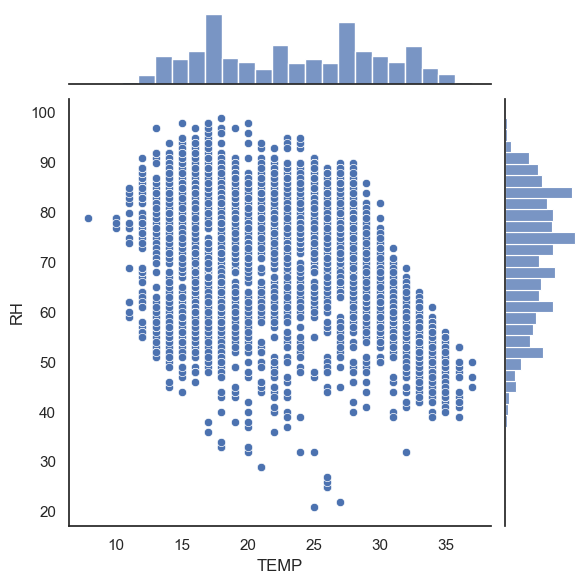

In [124]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='TEMP',y='RH',data=data)

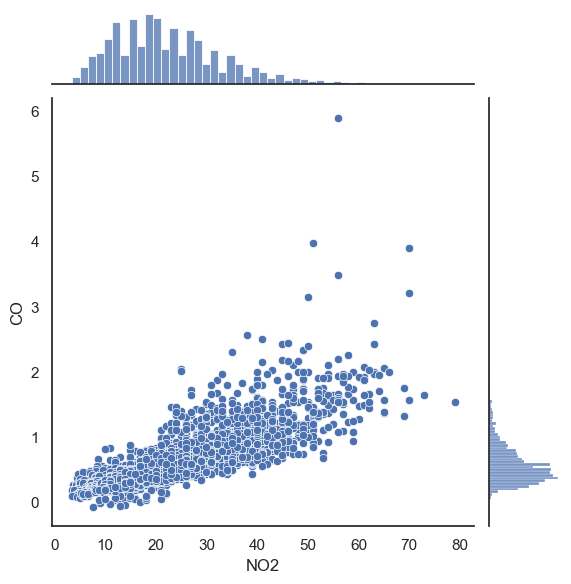

In [125]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='CO',data=data)

# Train Test Split

Now its time to split our data into a training set and a testing set!

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [150]:
X_train.to_excel('Traning_Testing/X_train.xlsx')
X_test.to_excel('Traning_Testing/X_test.xlsx')
y_train.to_excel('Traning_Testing/y_train.xlsx')
y_test.to_excel('Traning_Testing/y_test.xlsx')

import os
import pandas as pd

# Define the directory path
output_dir = "Traning_Testing"

# Ensure the directory exists before saving the files
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created missing directory: {output_dir}")

# Save the data to Excel
X_train.to_excel(os.path.join(output_dir, "X_train.xlsx"), index=False)
X_test.to_excel(os.path.join(output_dir, "X_test.xlsx"), index=False)
y_train.to_excel(os.path.join(output_dir, "y_train.xlsx"), index=False)
y_test.to_excel(os.path.join(output_dir, "y_test.xlsx"), index=False)

print("Files saved successfully!")


Files saved successfully!


# Training the Random Forest model

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(n_estimators=600)

In [131]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions

In [132]:
predictions = rfc.predict(X_test)

In [133]:
predictions

array([1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1,

**Now create a classification report from the results**

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       347
           2       0.97      0.97      0.97        40
           4       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       1.00      1.00      1.00      1000



C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [136]:
print(confusion_matrix(y_test,predictions))

[[612   0   0   0]
 [  1 346   0   0]
 [  0   1  39   0]
 [  0   0   1   0]]


In [137]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [138]:
CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()

In [139]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [140]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [141]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [142]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [143]:
def checkPM(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM-->  %2.3f    %s' %(q, v))

# Air Quality Analysis

In [144]:
import os

image_path = "img/1a.png"

# Check if the file exists
if os.path.exists(image_path):
    print("File found!")
else:
    print(f"Error: The file '{image_path}' does not exist. Check the path.")


Error: The file 'img/1a.png' does not exist. Check the path.


In [145]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
# plt.figure(figsize=(15,8), dpi=120)
# image = plt.imread('img/1a.png')
# plt.axis('off')
# plt.imshow(image)
# plt.show()

CO-->  0.609    Good
SO2-->  4.005    Good
NO2-->  23.113    Good
O3-->  25.698    Good
PM-->  52.579    Satisfactory


In [146]:
# plt.figure(figsize=(15,8), dpi=120)
# image = plt.imread('img/health.png')
# plt.axis('off')
# plt.imshow(image)
# plt.show()

# Real Time Prediction

In [147]:
x_test_dt = [[16,57,2.1,0.14,1.2,17,0.79,16,37,177,78,12]]

In [148]:
df = pd.DataFrame(x_test_dt)

In [149]:
pred = rfc.predict(df)

C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
